# ¿Cómo descompongo una matriz no cuadrada (SVD)?

Descomposición en Valores singulares(SVD)

http://www.mate.unlp.edu.ar/practicas/70_18_0911201012951

In [1]:
import numpy as np



Una matriz ortogonal es donde todos sus vectores son ortonormales
Dadas 3 matrices U, V y D
dondes U y V son matrices ortogonales y D es diagonal
y estan compuestas por
- U → vectores izquierdos singulares
- D → matriz diagonal de valores singulares
- V → vectores derechos singulares


Descomposición de una matriz en valores singulares
La descomposición por autovectores sólo es aplicable a matrices cuadradas. El presente método permite descomponer cualquier matriz en tres matrices:

- U → vectores izquierdos singulares
- D → matriz diagonal de valores singulares
- V → vectores derechos singulares

Usar np.linalg.svd para descomponer una matriz por el método SVD nos devuelve 3 objetos U, D, V ¿Qué es D?

Un vector que contiene los valores singulares en orden descendente

In [2]:
A = np.array([[1.,2.,3.],[3.,4.,5.]])
A


array([[1., 2., 3.],
       [3., 4., 5.]])

In [59]:
U, D, V = np.linalg.svd(A)
print(U)
print("-----")
print(D)
print("-----")
print(V)


[[-0.46410668  0.88577931]
 [-0.88577931 -0.46410668]]
-----
[7.97638869 0.61418515]
-----
[[-0.39133557 -0.5605708  -0.72980603]
 [-0.8247362  -0.13817999  0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


In [60]:
# para ver la matriz diagonal debemos procesarla
print(np.diag(D))

[[7.97638869 0.        ]
 [0.         0.61418515]]


In [61]:
# A sera igual al producto punto de todas las matrices resultantes de svd
# A = U * D * V
D_matriz = np.diag(D)
print(D_matriz)

# se le agrega otra columna para que coincida con la dimension de V
D_matriz = np.append(D_matriz, [[0], [0]], axis=1)

print(D_matriz)


[[7.97638869 0.        ]
 [0.         0.61418515]]
[[7.97638869 0.         0.        ]
 [0.         0.61418515 0.        ]]


In [62]:
A_calc = U.dot(D_matriz).dot(V)
# Se comprueba la combercion de matrices
A_calc


array([[1., 2., 3.],
       [3., 4., 5.]])

In [63]:
U.dot(D_matriz.dot(V))


array([[1., 2., 3.],
       [3., 4., 5.]])

In [64]:
A.shape == A_calc.shape

True

In [65]:
A == A_calc

array([[False, False, False],
       [False, False, False]])

In [66]:
A[0][0] == A_calc[0][0]

False

In [67]:
print(A[0][0])
print(A_calc[0][0])


1.0
0.9999999999999998


vemos que lo valores no son iguales ya que python esta trabajando con N decimales para aproximar el valor

In [68]:
A_calc.astype(int)


array([[0, 1, 2],
       [2, 3, 4]])

In [13]:
np.int_(A_calc)

array([[0, 1, 2],
       [2, 3, 4]])

In [14]:
np.around(A_calc)

array([[1., 2., 3.],
       [3., 4., 5.]])

In [15]:
np.around(A_calc) == A

array([[ True,  True,  True],
       [ True,  True,  True]])

### Efecto visual del svd
Efecto de la transformación SVD sobre el circulo unitario

In [102]:
print("Datos:")
print("----- U ")
print(U)
print("----- D ")
print(D)
print("----- V ")
print(V)


Datos:
----- U 
[[-0.46410668  0.88577931]
 [-0.88577931 -0.46410668]]
----- D 
[7.97638869 0.61418515]
----- V 
[[-0.39133557 -0.5605708  -0.72980603]
 [-0.8247362  -0.13817999  0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


In [101]:
import matplotlib.pyplot as plt
%run "../funciones_auxiliares/graficarMatriz.ipynb"
%run "../funciones_auxiliares/graficarVectores.ipynb"
print("-----")
print(np.eye(2))
print("-----")
print(U)
print("-----")
print(U.dot(D_matriz))
print("-----")
print(U.dot(D_matriz).dot(V))


-----
[[1. 0.]
 [0. 1.]]
-----
[[-0.46410668  0.88577931]
 [-0.88577931 -0.46410668]]
-----
[[-3.70189528  0.5440325   0.        ]
 [-7.06532009 -0.28504743  0.        ]]
-----
[[1. 2. 3.]
 [3. 4. 5.]]


In [18]:
print(np.eye(2))
print("V -----")
print(V)
print("D * V -----")
print(D_matriz.dot(V))
print("U * D * V-----")
print(U.dot(D_matriz.dot(V)))


[[1. 0.]
 [0. 1.]]
V -----
[[-0.39133557 -0.5605708  -0.72980603]
 [-0.8247362  -0.13817999  0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]
D * V -----
[[-3.12144462 -4.47133061 -5.8212166 ]
 [-0.50654073 -0.0848681   0.33680453]]
U * D * V-----
[[1. 2. 3.]
 [3. 4. 5.]]


Circulo unitario


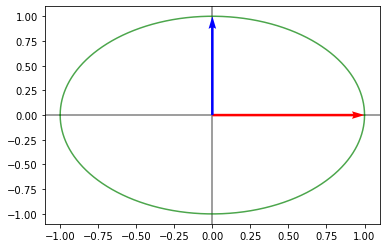

In [19]:
print('Circulo unitario')
graficarMatriz(np.eye(2))


Primer rotacion U


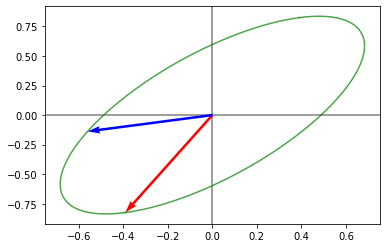

In [105]:
%matplotlib inline
print('Primer rotacion V')
graficarMatriz(V)


In [21]:
# print('rotacion V')
# graficarMatriz(V)


Escala (D) a U


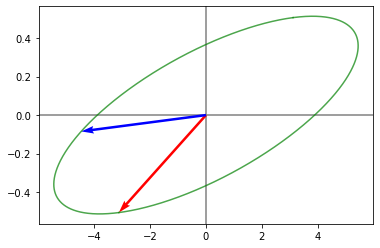

In [107]:
print('Escala (D) a V')
graficarMatriz(D_matriz.dot(V))


In [23]:
# print('Escala (D) a V')
# graficarMatriz(D_matriz.dot(V))


Segunda rotacion V


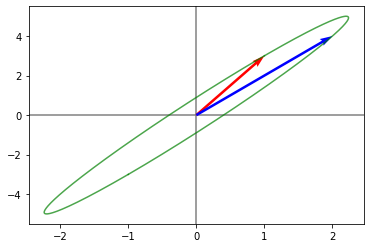

In [109]:
print('Segunda rotacion U')
graficarMatriz(U.dot(D_matriz.dot(V)))


Original A


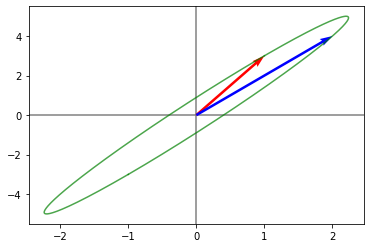

In [110]:
print("Original A")
graficarMatriz(A)


Ahora en 3d

In [26]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [72]:
U


array([[-0.46410668,  0.88577931],
       [-0.88577931, -0.46410668]])

In [71]:
U_temp = np.append(U, [[0], [0]], axis=1)
U_temp


array([[-0.46410668,  0.88577931,  0.        ],
       [-0.88577931, -0.46410668,  0.        ]])

In [112]:
unit = np.eye(3)
unit


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Reto realizar el grafico con las 3 lineas desde el origen 

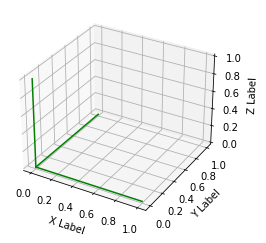

In [111]:
%matplotlib inline
fig = plt.figure(figsize=(4, 4))
unit = np.eye(3)
ax = fig.add_subplot(111, projection='3d')

for el in unit:
  # pintando las lineas desde el origen
  ax.plot([0,el[0]], [0,el[1]], [0,el[2]], 'green')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


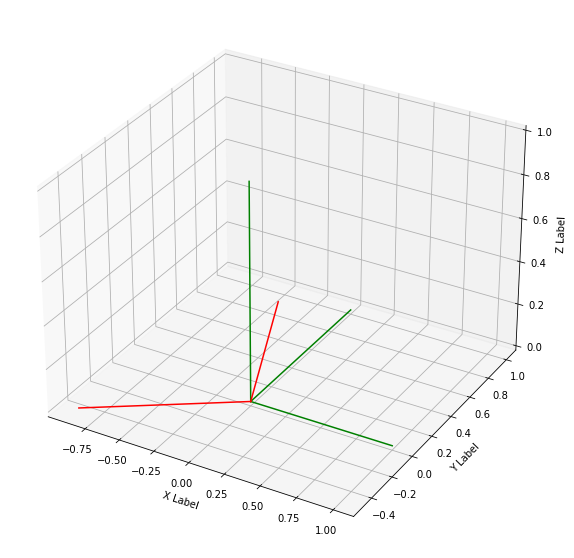

In [115]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for el in unit:
  # pintando las lineas desde el origen
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'green')

for el in U_temp:
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'red')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [74]:
step2 = U.dot(D_matriz)
step2


array([[-3.70189528,  0.5440325 ,  0.        ],
       [-7.06532009, -0.28504743,  0.        ]])

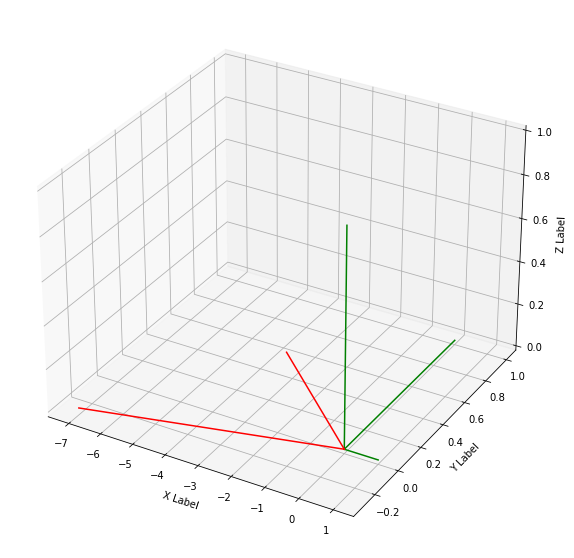

In [92]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for el in unit:
  # pintando las lineas desde el origen
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'green')

for el in step2:
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'red')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [77]:
step3 = U.dot(D_matriz).dot(V)
step3


array([[1., 2., 3.],
       [3., 4., 5.]])

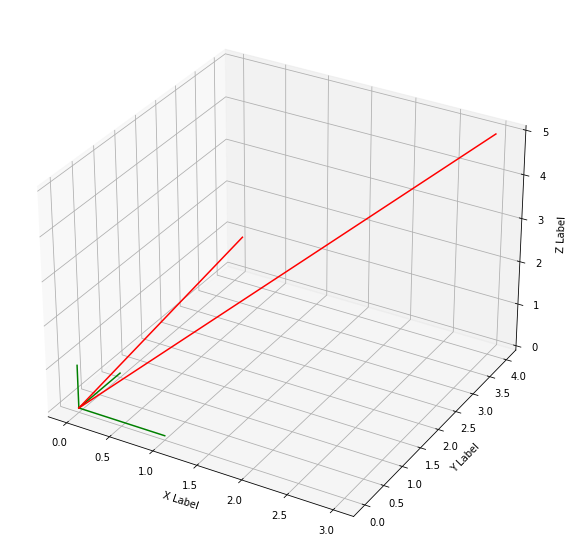

In [93]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for el in unit:
  # pintando las lineas desde el origen
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'green')

for el in step3:
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'red')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


## Rotando primero con V

In [118]:
V

array([[-0.39133557, -0.5605708 , -0.72980603],
       [-0.8247362 , -0.13817999,  0.54837623],
       [ 0.40824829, -0.81649658,  0.40824829]])

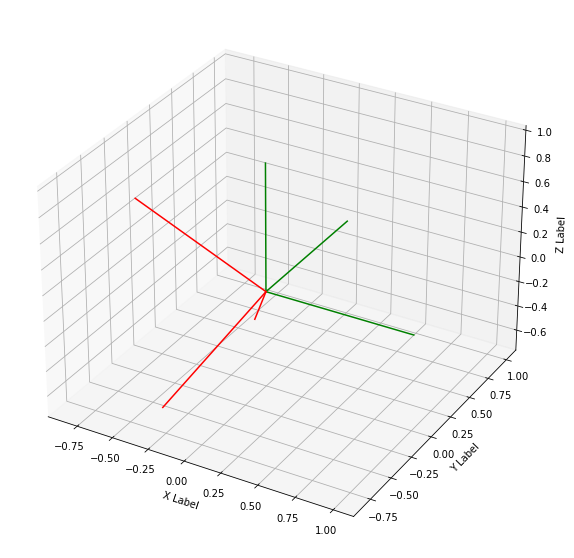

In [119]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for el in unit:
  # pintando las lineas desde el origen
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'green')

for el in V:
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'red')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [120]:
step__2 = D_matriz.dot(V)
step__2


array([[-3.12144462, -4.47133061, -5.8212166 ],
       [-0.50654073, -0.0848681 ,  0.33680453]])

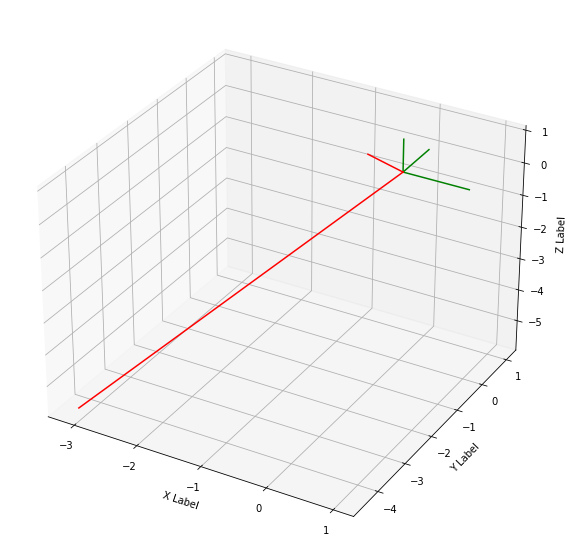

In [121]:
# %matplotlib qt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for el in unit:
  # pintando las lineas desde el origen
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'green')

for el in step__2:
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'red')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [122]:
step__3 = U.dot(D_matriz.dot(V))
step__3


array([[1., 2., 3.],
       [3., 4., 5.]])

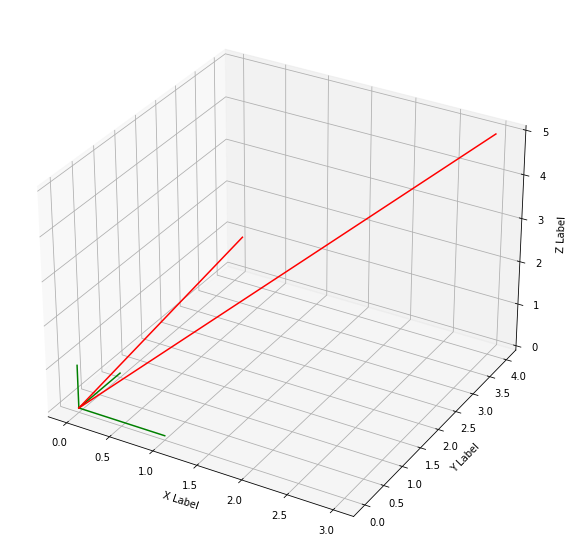

In [123]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for el in unit:
  # pintando las lineas desde el origen
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'green')

for el in step__3:
  ax.plot([0, el[0]], [0, el[1]], [0, el[2]], 'red')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


## Ejercicio

Al descomponer una matriz no cuadrada A por el método SVD obtenemos 3 matrices, U, D, V. Donde podemos interpretar a cada matriz como una transformación que debe ser aplicada en el siguiente orden:

~~U -> Primera rotación D -> Escala V -> Segunda rotación~~
